# $$ \textbf{Sinais e Sistemas Dinâmicos}$$

### Curso de Engenharia de Computação - UFPB/2024.1


Este Notebook é utilizado para o estudo da disciplina  **Sinais e Sistemas Dinâmicos** através da bibliografia 

- [Análise Linear de Sinais: teoria, ensaios práticos e exercícios. José C. Geromel e Grace S. Deaecto. Ed. Blucher, 2019] 

- [Análise Linear de Sistemas Dinâmicos, José C. Geromel, Alvaro G. B. Palhares. ed. Blucher, 2019]

- [Sinais e Sistemas Lineares - 2.ed. B.P. Lathi, 2006]




In [3]:
## Importação das bibliotecas Python, como indicado no texto ##

# biblioteca Python para matemática simbólica 
import sympy as sym
from sympy import* 

# Pacote para computação científica
import numpy as np

# biblioteca para a visualização de dados em Python.
import matplotlib.pyplot as plt

from pylab import plot, show

# Este módulo fornece acesso às funções matemáticas (definidas pelo padrão C)
import math

# cmath permite operações com números complexos
import cmath

# O módulo de frações fornece suporte para aritmética de números racionais
from fractions import Fraction

# permite usar latex para exibir equações matemáticas no Jupyter Notebook
from IPython.display import display, Math

#toolbox de processamento de sinais
from scipy import signal 

# Aula 01

## Apresentação do Curso

**Sinais e Sistemas Dinâmicos**

60 horas – 04 Créditos

**Pré-requisitos:** Séries e Equações Diferenciais Ordinárias

**Ementa:** Sinais em tempo contínuo e em tempo discreto; energia e potência de sinais; classificações e propriedades de sinais; transformações da variável independente; classificação e propriedades de sistemas: Memória, Invertibilidade, Causalidade, Estabilidade, Invariância temporal, Linearidade; sistemas lineares e invariantes no tempo (LIT) e suas propriedades; convolução e resposta a impulso unitário; equações diferenciais e de diferença finita; associação de sistemas e representação em diagrama de blocos; representação de sinais periódicos em série de Fourier (tempo contínuo e discreto); propriedades da série de Fourier; filtragem: filtros seletivos de frequência, passaalta, passabaixa, passafaixa; filtrosem tempo discreto: recursivo, nãorecursivo;transformada de Fourier e suas propriedades; caracterização de sinais no domínio de frequências; gráficos de Bode; discretização por amostragem; sistemas de comunicação (AM e FM); transformada de Laplace; caracterização de sistemas usando a transformada de Laplace; filtros de Butterworth; transformada z e suas aplicações; função de transferência de tempo discreto.

**Referências:**

- Sinais e Sistemas. A. V. Oppenheim, A. S. Willsky, 2a ed. Prentice Hall, Pearson Education BR, 1997.

- Signals and Systems. S. Haykin and B. V. Veen, Wiley, 2005.

- **Sinais e Sistemas Lineates, B. P. Lathi; 2. ed. Porto Alegre: Bookman, 2008.**

- **Análise Linear de Sinais: teoria, ensaios práticos e exercícios. José C. Geromel e Grace S. Deaecto. Ed. Blucher, 2019.**

- **Análise Linear de Sistemas Dinâmicos, José C. Geromel, Alvaro G. B. Palhares. ed. Blucher, 2019.**



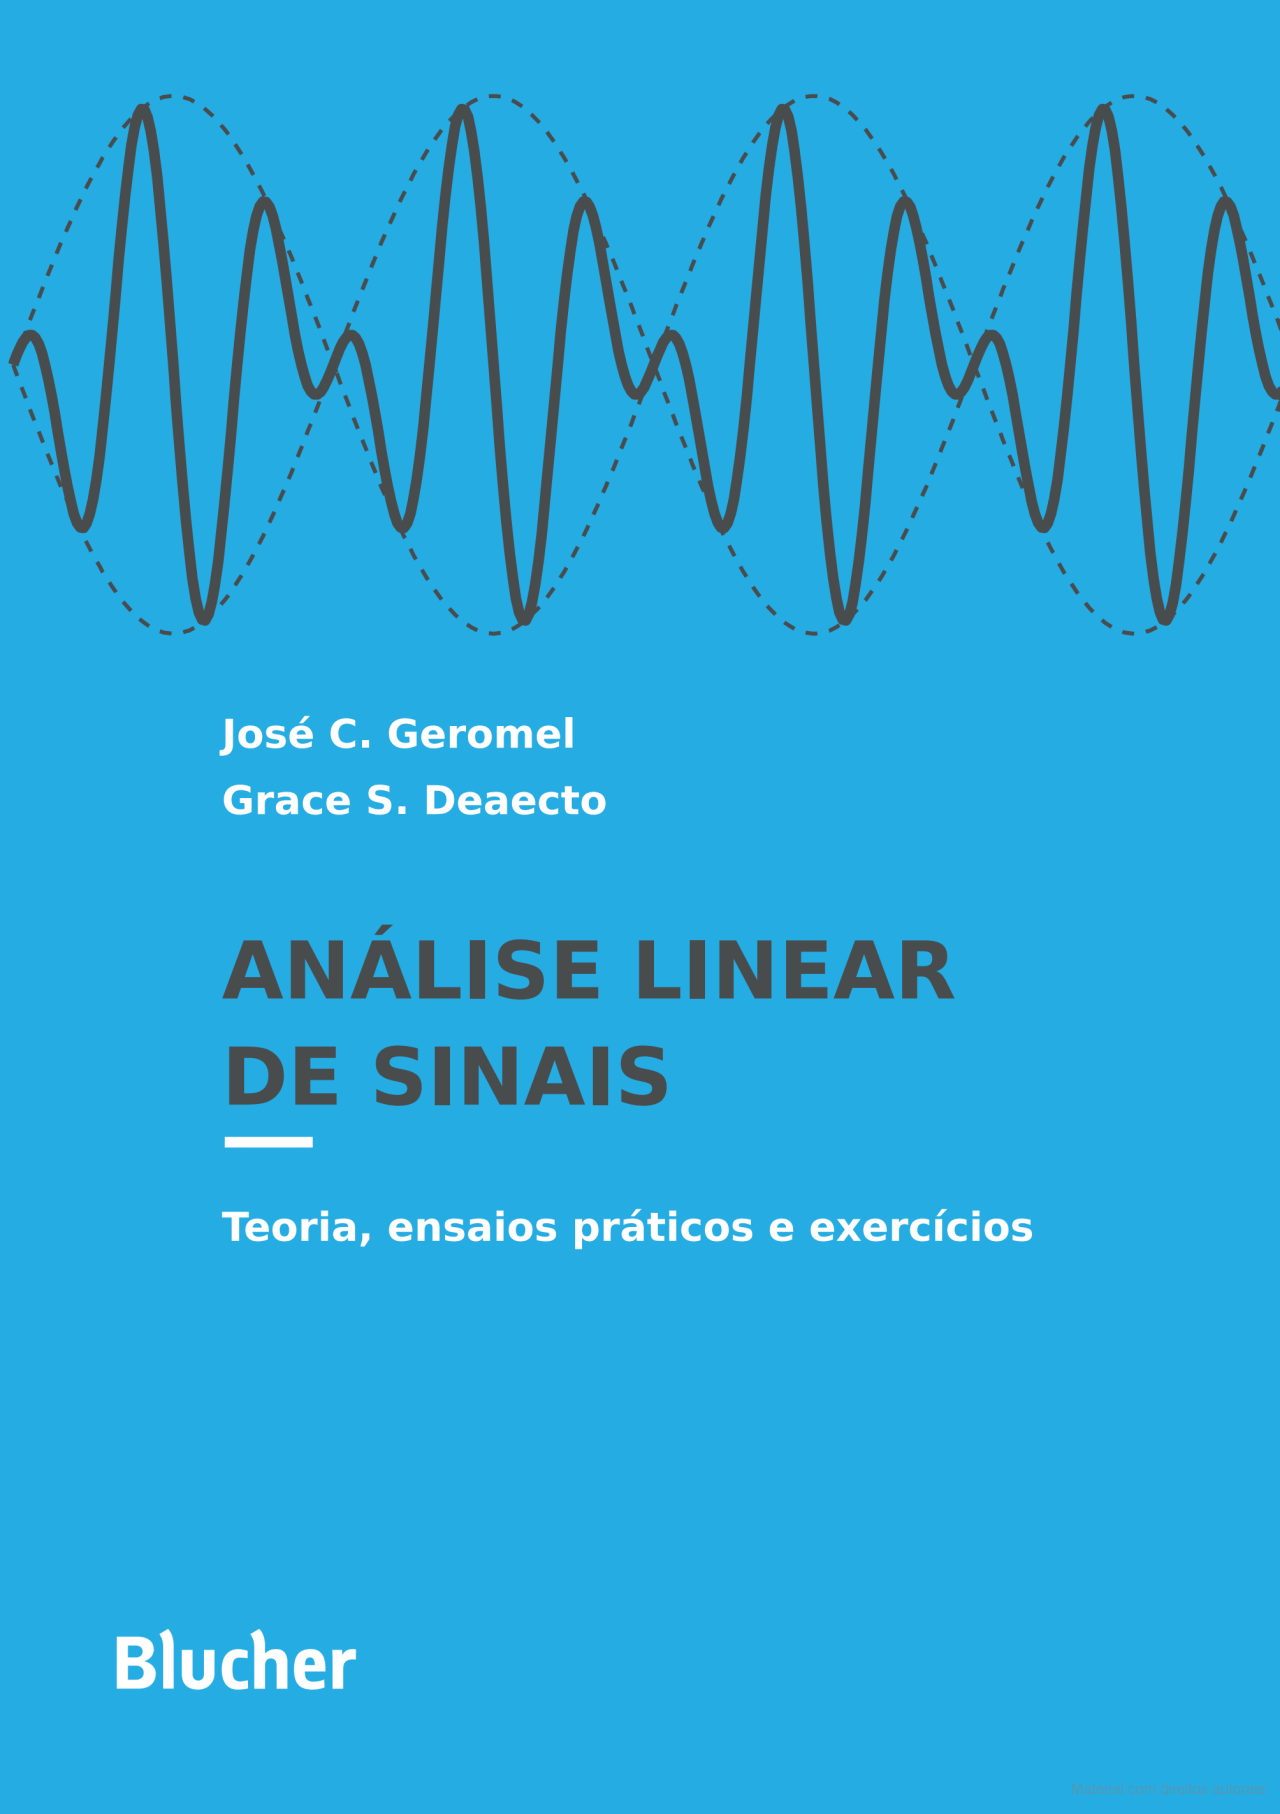

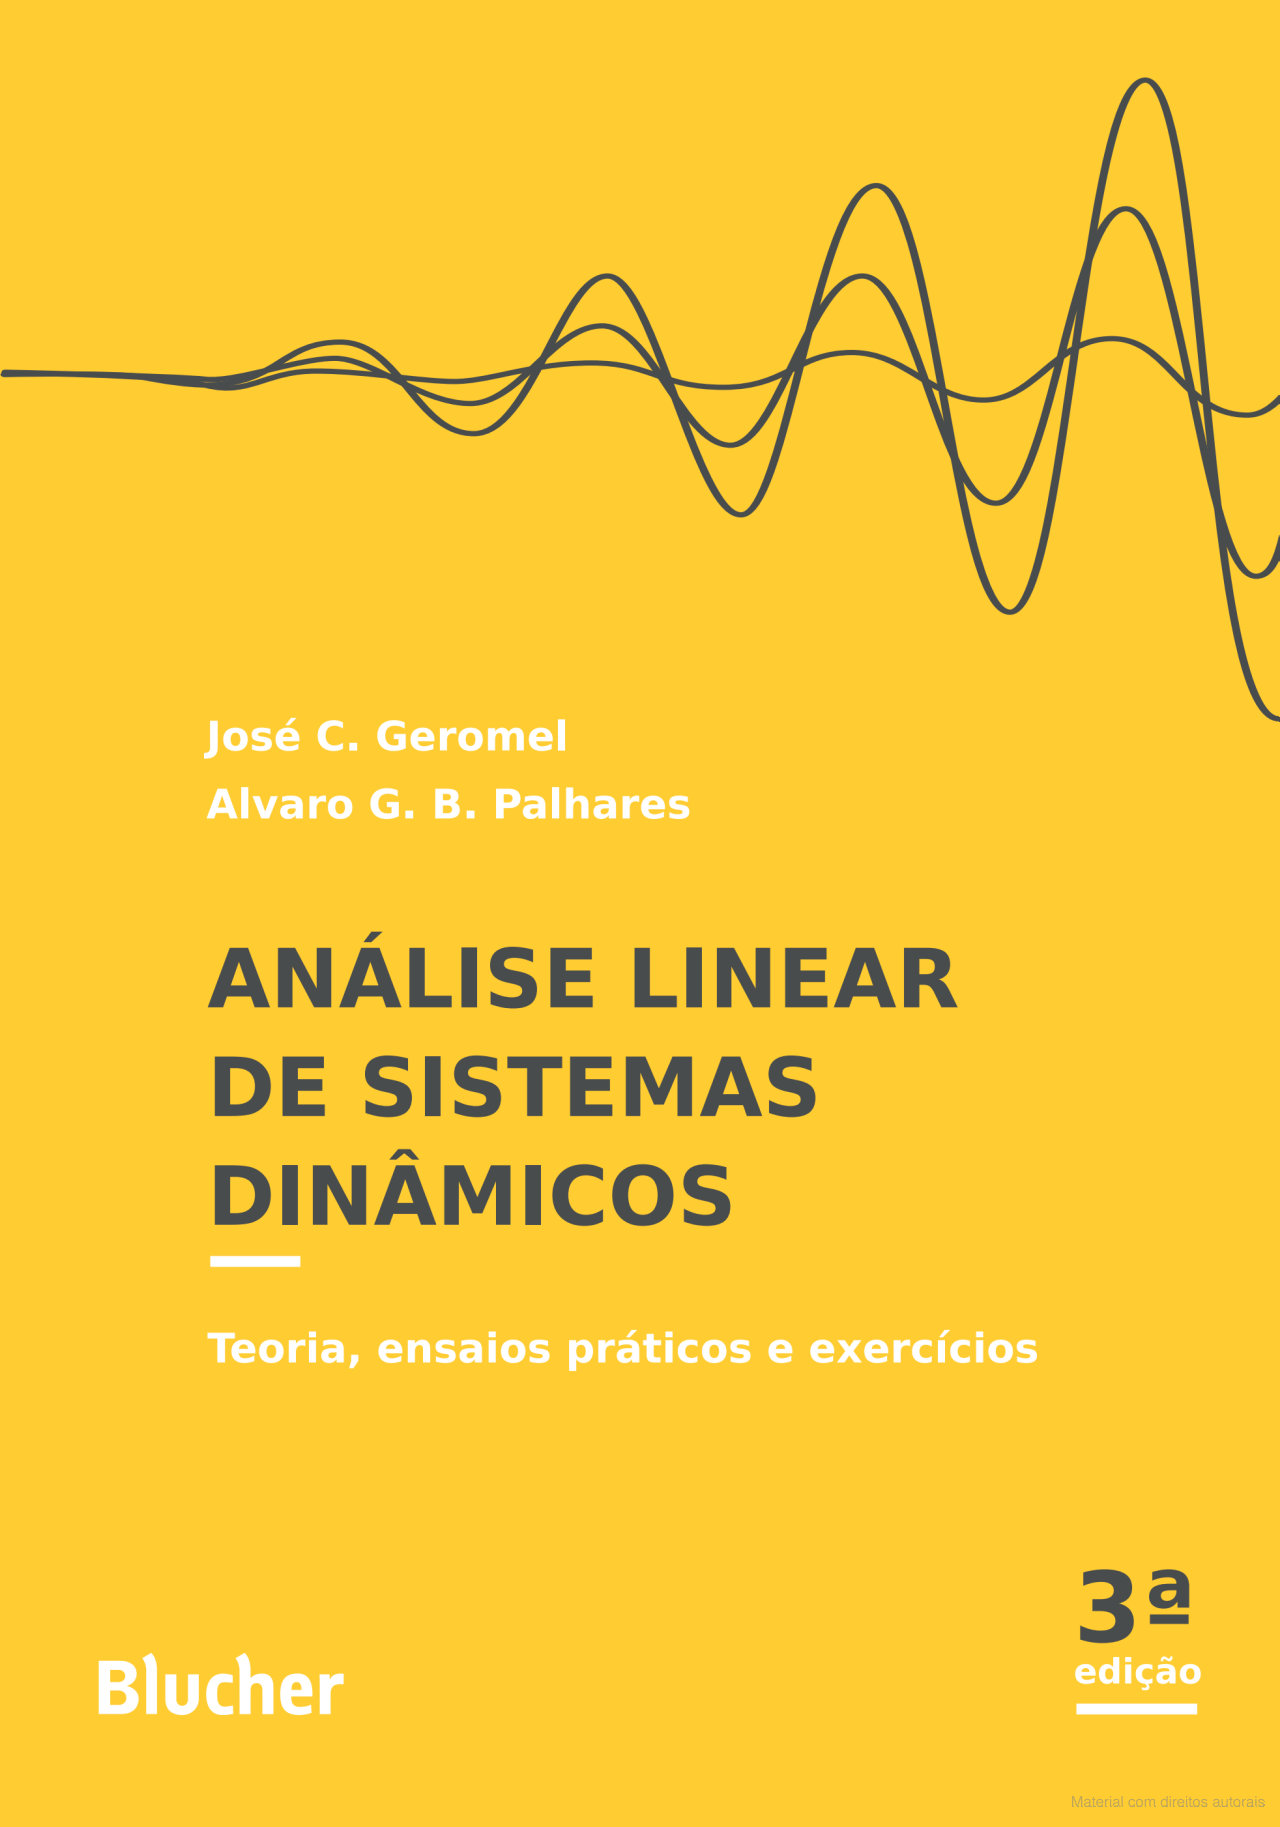

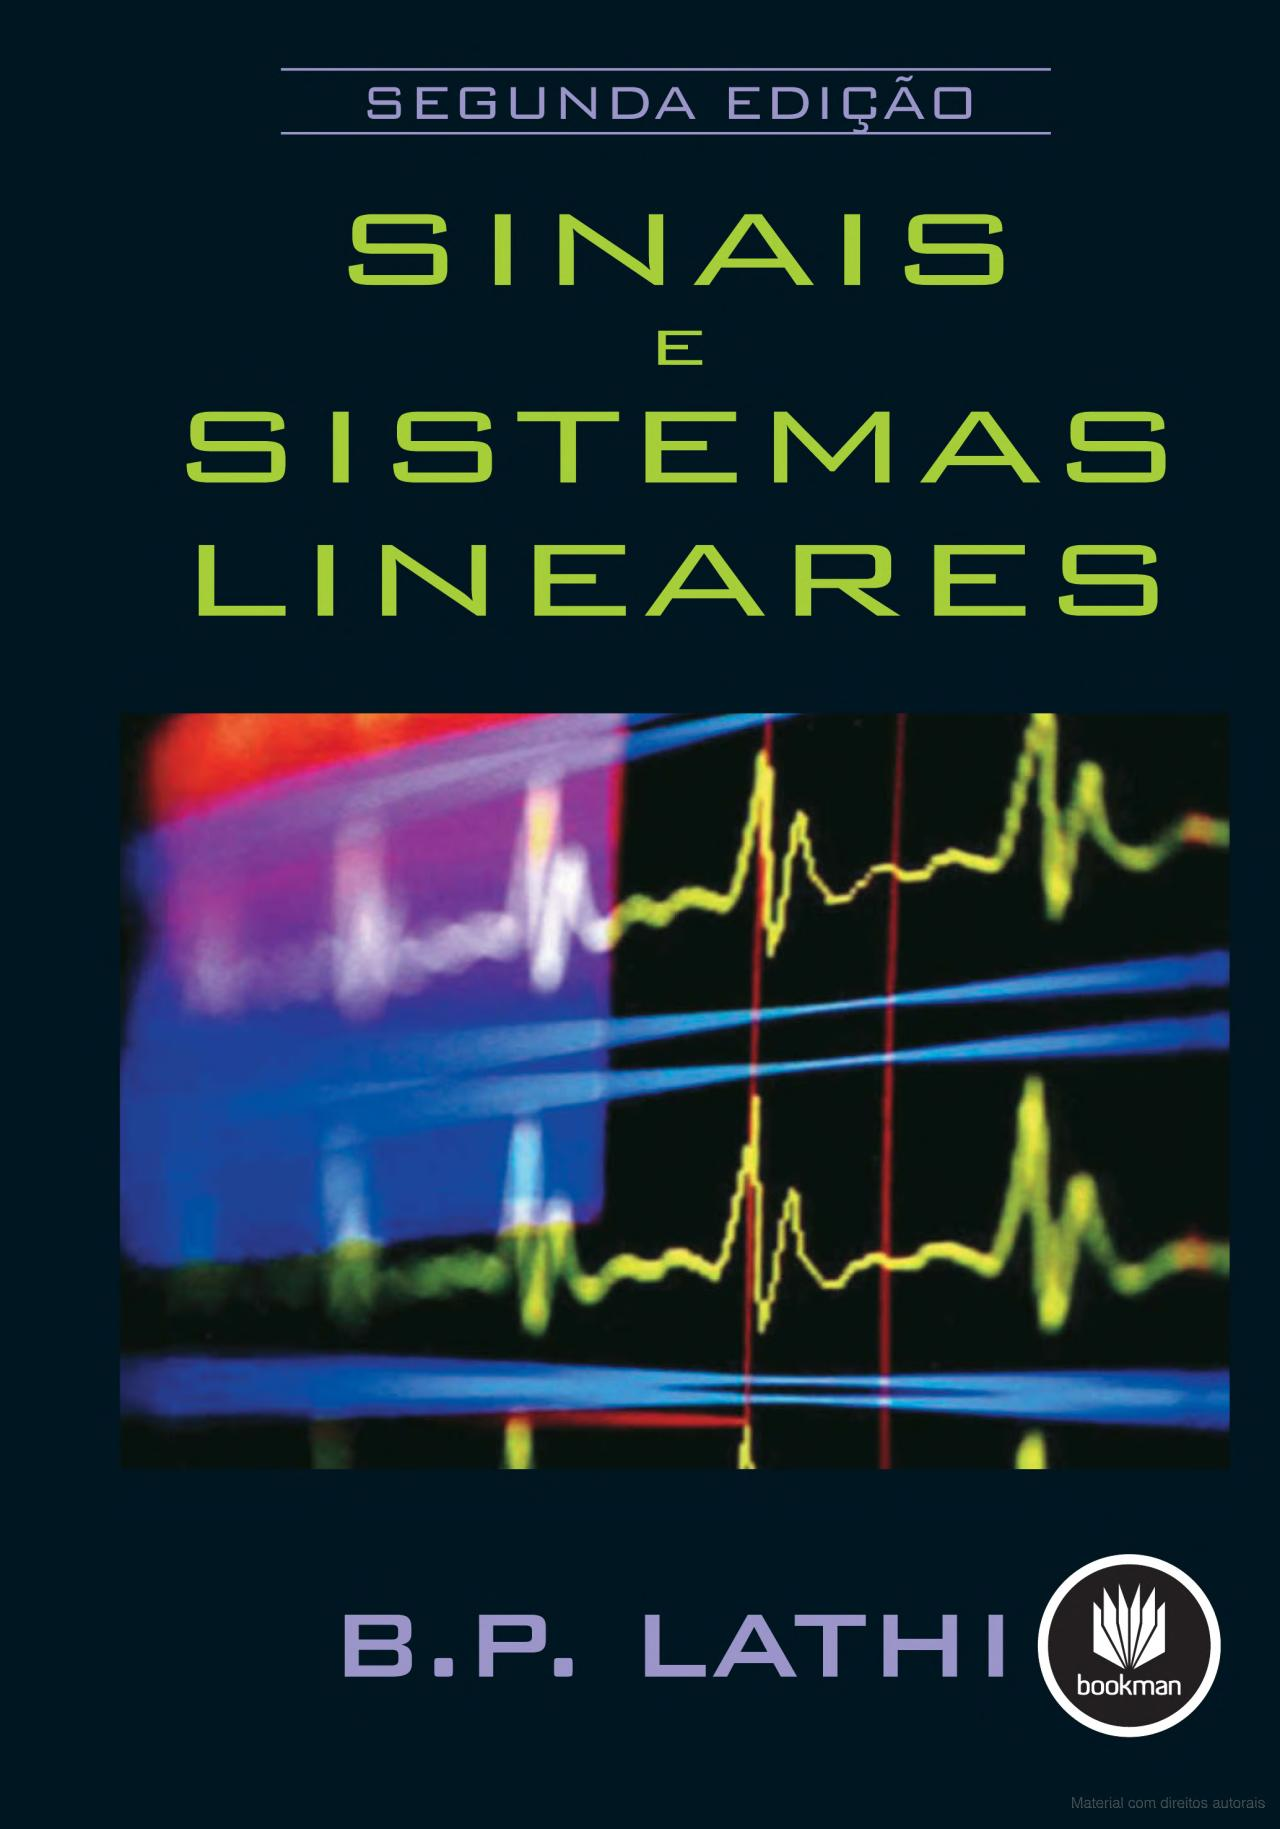

### Avaliações

A disciplina é dividida em 03 unidades - ao final de cada unidade será realizada uma prova ($P_1, P_2$ e $P_3$) e a média será calculada através da fórmula

$$
\text{média} = \frac{P_1 + P_2 + P_3 + L}{4}, 
$$

onde, $L = \sum_1^3 L_i$ corresponde às listas de exercícios referentes a cada unidade.

**Observação:** Não há segunda chamada para as listas! 


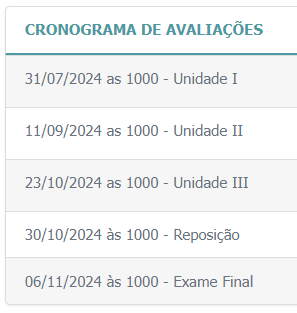

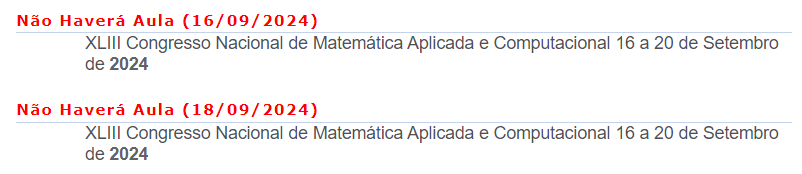

### Apresentação Pessoal

- e-mail: jairo@ci.ufpb.br - Sala 207

- horário de atendimento: 24T26 e 3M26 (presencial/virtual)

[Currículo Lattes](http://lattes.cnpq.br/0796077542730627)

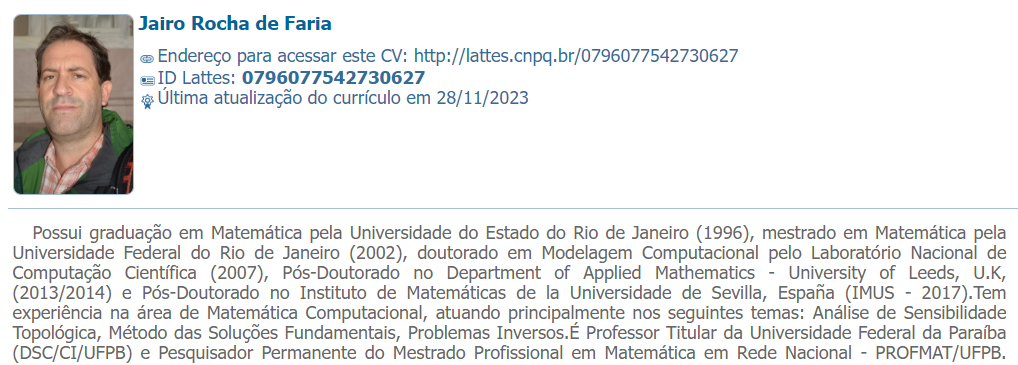

### Metodologia

Neste curso incentivamos a sala de aula invertida (*flipped classroom*), onde o conteúdo é estudado individualmente e as atividades (exemplos, exercícios) são realizados em sala de aula - permitindo que o(a) estudante assuma o protagonismo de seu aprendizado e outras vantagens como: maior participação da turma, ensino personalizado e otimização do tempo. Para tanto, as lições da semana são disponibilizadas com antecedência na plataforma SIGAA.

Também deve ser ressaltada a utilização da computação simbólica como um meio facilitador da aprendizagem, sendo permitido seu uso em parte das avaliações.

## Sinais

### Introdução


A todo instante estamos imersos em um ambiente que está pleno de sinais. As ondas de rádio e de televisāo, as que chegam no nosso telefone fixo (através do fio) e no celular (através do ar) sabemos classificar, corretamente, como sinais. Mais ainda, o número de ovos colhidos cada dia em um aviário também é um sinal. 

De forma bastante genérica, ``todo conjunto de dados organizados segundo uma ordem preestabelecida é um sinal.`` A ordenação mencionada é realizada com o uso de uma variável independente, em geral, o tempo $t \in \mathbb{R}$, que é número real em tempo contínuo, ou $k \in \mathbb{Z}$, um número inteiro em tempo discreto.

Para tornar mais claro este conceito vamos imaginar que um hospital tenha armazenado na posiçāo $(i, j)$ de uma matriz $A$ o número de batimentos cardíacos de cada um dos seus pacientes $i \in[1,100]$ durante cada hora $j \in[1,168]$ de uma semana. Esta matriz, com elementos $a_{i j}$, contém 16.800 números, dispostos em 100 linhas e 168 colunas, que podem ser facilmente acessados. Por exemplo, para saber como se comportou o coração do paciente número $i=57$, basta verificar o sinal $a_{i j}$ para $i=57$ e todo $j \in[1,168]$. Da mesma forma, se desejarmos saber como estavam os pacientes em uma determinada hora $j=127$, basta analisar o sinal $a_{i j}$ para $j=127$ e todo $i \in[1,100]$. No primeiro caso a variável independente é o tempo, mas no segundo é o número atribuído a cada paciente. 

Como veremos mais adiante, ``os sinais são representados matematicamente por funções que levam elementos de`` $\mathbb{R}$ ``ou ``$\mathbb{Z}$ ``para`` $\mathbb{R}$ ``ou`` $\mathbb{C}$. Neste sentido, podemos manipular, transformar e representar sinais através da aplicação de qualquer operação matemática válida, com o objetivo de armazená-lo ou dele extrair informações da maneira mais simples e eficiente possível.

**Exemplo 2.1 (Série histórica de vazões)** A operação eficiente das várias usinas hidrelétricas que temos no nosso país requer o conhecimento antecipado das vazōes de água nos diversos rios que alimentam cada bacia hidrográfica. A Figura 2.1 mostra as vazões mínima e máxima mensais expressas em $\left[\mathrm{m}^3 / \mathrm{s}\right]$ calculadas a partir de medições realizadas mensalmente entre os anos de 1931 e 2014 no reservatório da usina de Furnas. Entre as vazões mínima e máxima desenhadas em linhas contínuas, colocamos em linha tracejada a vazão média mensal do ano 1952. Podemos entender esta figura como a representação gráfica de um sinal que tem como variável independente o tempo.


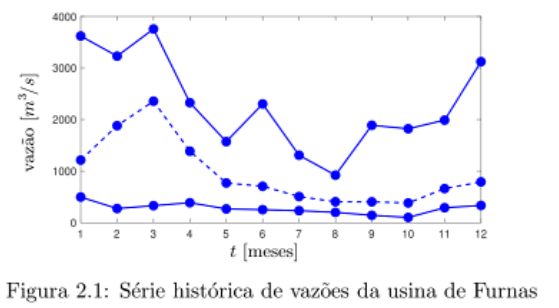


O exemplo que acabamos de apresentar serve para colocar em evidência algumas características importantes dos sinais. Elas permitem dividi-los em classes que sāo tratadas através de ferramentas matemáticas específicas. Para bem evidenciar as diferenças mais marcantes entre os diversos sinais, vamos denotar um sinal genérico na forma de uma função
$$
s: \mathfrak{D} \rightarrow \mathfrak{J}
$$
com domínio $\mathfrak{D}$ e conjunto imagem (ou simplesmente imagem) $\mathfrak{J}$. Podemos descrever as seguintes classes:

- **Sinais a tempo contínuo ou sinais a tempo discreto:** Os sinais a tempo contínuo sāo aqueles em que o domínio é o conjunto dos números reais, isto é, $\mathfrak{D} \equiv \mathbb{R}$. São, portanto, expressos por funções do tipo $s(t)$, definidas para todo $t \in \mathbb{R}$. Os sinais a tempo discreto são aqueles em que o domínio é o conjunto dos números inteiros, isto é, $\mathfrak{D} \equiv \mathbb{Z}$. São modelados por sequências numéricas do tipo $s(k)$, definidas para todo $k \in \mathbb{Z}$. ``Pode-se obter um sinal a tempo discreto a partir de um sinal a tempo contínuo através de uma operação denominada amostragem``, que é caracterizada por um determinado periodo $T>0$, ou seja, $s(k)=h(k T)$ é o valor do sinal a tempo contínuo $h(t)$ avaliado, periodicamente, nos instantes de amostragem $t=k T$ para todo $k \in \mathbb{Z}$.

- **Sinais analógicos ou sinais digitais:** Um sinal é dito analógico se a sua imagem $\mathfrak{J}$ for o conjunto dos números reais $\mathbb{R}$ ou, ainda mais geral, o conjunto dos números complexos $\mathbb{C}$. Se, no entanto, a sua imagem for um conjunto com um número finito de elementos, ele será um sinal digital. Um dos mais conhecidos é o ``sinal binário`` para o qual a sua imagem $\mathfrak{J}=\{0,1\}$ tem apenas dois elementos. ``Pode-se também obter um sinal digital a partir de um sinal analógico através de um processo chamado codificaçäo``. Neste processo, o sinal analógico é amostrado e, em seguida, é representado por um número binário que pode assumir apenas um número finito de valores que depende do número de bits disponível. Quanto maior o número de bits, mais próximo o sinal digital se torna do sinal analógico original.

- **Sinais periódicos ou sinais aperiódicos:** Um sinal $s(t)$ é periódico se existir $T_0>0$ tal que $s(t)=s\left(t+T_0\right)$, em que $t+T_0 \in \mathfrak{D}$ para todo $t \in \mathfrak{D }$ e aperiódico caso contrário. O menor valor de $T_0>0$ é denominado ``período fundamental.`` É claro que a restriçāo $t+T_0 \in \mathcal{D}$ delimita os possíveis valores para $T_0$. De fato, para sinais a tempo contínuo $T_0 \in \mathbb{R}_{+}$e para sinais a tempo discreto $T_0 \in \mathbb{N}$. Nota-se imediatamente, e isso é muito importante, que para ser periódico é necessário que o sinal seja definido em todo o intervalo de tempo correspondente ao seu domínio, isto é, $t \in \mathbb{R}$ ou $k \in \mathbb{Z}$.

- **Sinais determinísticos ou sinais estocásticos:** Sinais perfeitamente conhecidos, como por exemplo a tensāo em um capacitor de um circuito RC alimentado por uma fonte de tensão conhecida, são denominados sinais determinísticos. Os sinais que só podem ser conhecidos em termos probabilisticos, tais como sua média e seu desvio padrāo em cada instante de tempo, são denominados sinais estocásticos. Por exemplo, a vazão em uma usina pode ser modelada como um sinal estocástico. Este tipo de modelagem permite fazer estimaçōes sobre comportamentos futuros que são bastante úteis.


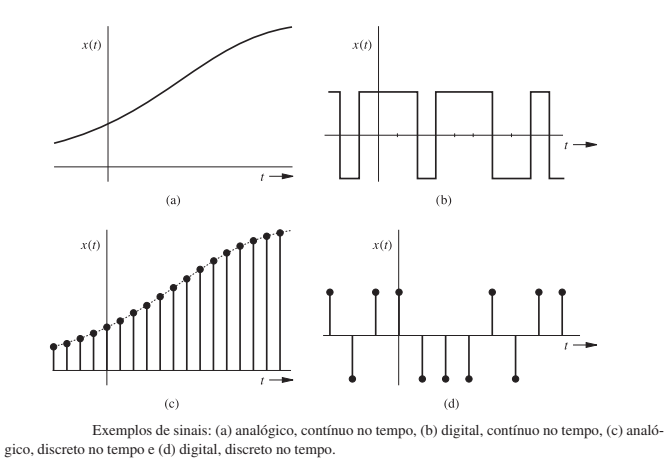
[Lathi, 2006]


Essas classes sāo as mais importantes para os nossos propósitos. De fato, elas são suficientemente delimitadas, mas ao mesmo tempo bastante abrangentes, o que torna conveniente estabelecer estudos especificos para cada uma delas. Por exemplo, sinais periódicos são mais simples de ser analisados pois são completamente conhecidos desde que se conheça o seu comportamento em um intervalo de tempo correspondente a apenas um único período.

**Exemplo 2.2** 

a) O sinal $s(t)=\operatorname{sen}(t)$ tem domínio $\mathbb{R}$ e imagem $[-1,1] \subset \mathbb{R}$. É um sinal a tempo contínuo, analógico e periódico com período $T_0=2 \pi$. 

b) O sinal $s(k)=\operatorname{sen}(k)$ tem domínio $\mathbb{Z}$ e imagem $[-1,1] \subset \mathbb{R}$. Portanto, trata-se de um sinal a tempo discreto, analógico e aperiódico. É aperiódico pois a igualdade $\operatorname{sen}\left(k+N_0\right)=\operatorname{sen}(k)$ não tem como ser satisfeita para todo $k \in \mathbb{Z}$ e algum $N_0 \in \mathbb{N}$. 

c) O sinal $s(k)=\operatorname{sen}((\pi / 2) k)$ tem domínio $\mathbb{Z}$ e imagem $\{-1,0,1\}$. Verificamos imediatamente que se trata de um sinal a tempo discreto, digital e periódico, com período $N_0=4$.


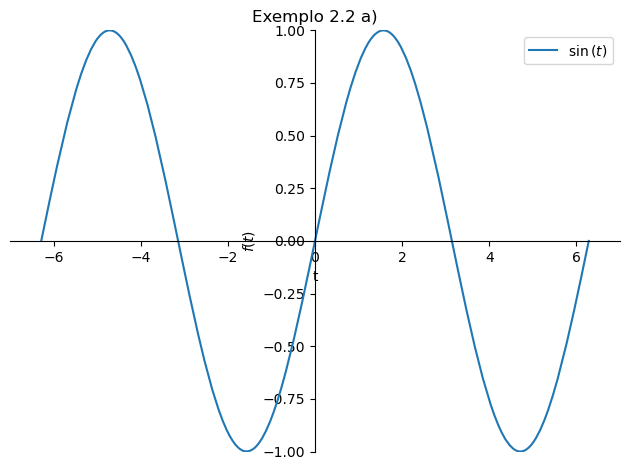

In [141]:
t = sym.Symbol('t')

s = sin(t)

p1 = sym.plot(s, (t, -2*pi, 2*pi), xlim=[-7, 7], ylim=[-1.0, 1.0], \
              title='Exemplo 2.2 a)', xlabel='t', legend=True, show=False)
p1.line_color = 'c'
p1.show()

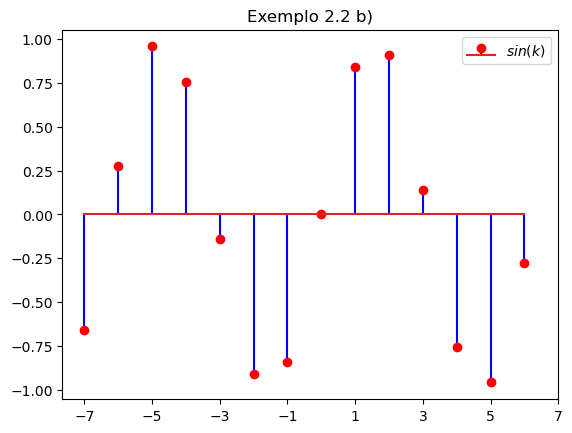

In [142]:
z = []
s1 = []
for k in range(-7,7):
    z.append(k)
    s1.append(sin(k))
       
plt.stem(z, s1, 'b', markerfmt='ro', label='$sin(k)$')
plt.legend()
plt.title('Exemplo 2.2 b)')
plt.xticks(range(-7,8,2))
plt.show()

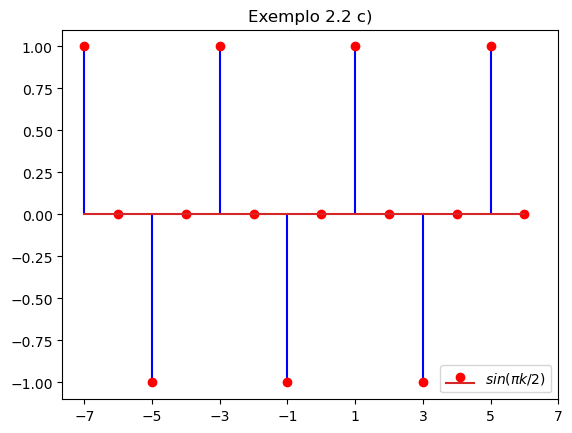

In [45]:
z = []
s2 = []
for k in range(-7,7):
    z.append(k)
    s2.append(sin(pi*k/2))
       
plt.stem(z, s2, 'b', markerfmt='ro', label='$sin(\pi k/2)$')
plt.legend()
plt.title('Exemplo 2.2 c)')
plt.xticks(range(-7,8,2))
plt.show()

**Exemplo 2.3** 

a) O sinal $s(t)=s_1(t)+s_2(t)$ é a soma de dois sinais periódicos $s_1(t)=$ $\operatorname{sen}(\pi t)$ com período $T_{01}=2[\mathrm{~s}]$ e $s_2(t)=\operatorname{sen}(4 t)$ com periodo $T_{02}=\pi / 2[\mathrm{~s}]$, mas não é periódico. Note que, se assim fosse, $s(t)=s\left(t+T_0\right)=s_1\left(t+T_0\right)+s_2\left(t+T_0\right)$. Como $s_1(t)=s_1\left(t+n T_{01}\right)$ e $s_2(t)=s_2\left(t+m T_{02}\right)$ com $m, n \in \mathbb{N}$, então, $n T_{01}=m T_{02}=T_0 \mathrm{e}$, portanto, $T_{01} / T_{02}=m / n$ deve ser um número racional. No caso em questão, $T_{01} / T_{02}=$ $4 / \pi$, o que indica que o sinal $s(t)$ é aperiódico. 

b) Se o segundo sinal for $s_2(t)=\cos (8 \pi t / 3)$ com período $T_{02}=3 / 4[\mathrm{~s}]$, então $T_{01} / T_{02}=8 / 3$, o que indica que o sinal $s(t)$ torna-se periódico. O seu período é obtido determinando-se o mínimo múltiplo comum de ambos os períodos $\{2,3 / 4\}$, o que fornece $T_0=6[\mathrm{~s}]$. Como pode ser observado na figura abaixo, esta operacão identifica o menor intervalo de tempo $t \in\left[0, T_0\right]$, com $T_0>0$, em que os ciclos periódicos de ambos os sinais coincidem.



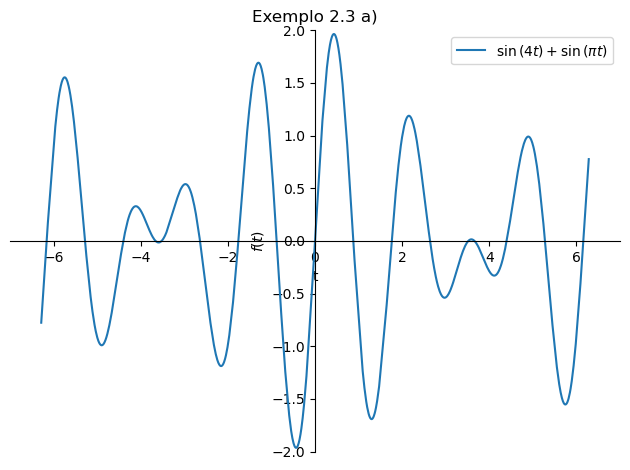

In [143]:
t = sym.Symbol('t')

s1 = sin(pi*t)
s2 = sin(4*t)
s = s1 + s2

p1 = sym.plot(s, (t, -2*pi, 2*pi), xlim=[-7, 7], ylim=[-2.0, 2.0], \
              title='Exemplo 2.3 a)', xlabel='t', legend=True, show=False)
p1.line_color = 'c'
p1.show()

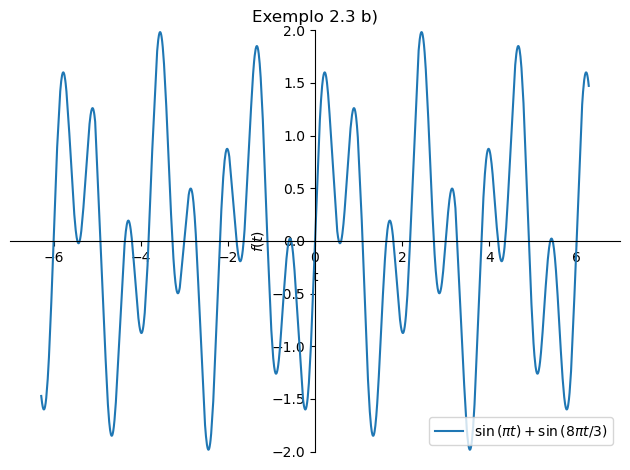

In [52]:
t = sym.Symbol('t')

s1 = sin(pi*t)
s2 = sin(8*pi*t/3)
s = s1 + s2

p1 = sym.plot(s, (t, -2*pi, 2*pi), xlim=[-7, 7], ylim=[-2.0, 2.0], \
              title='Exemplo 2.3 b)', xlabel='t', legend=True, show=False)
p1.line_color = 'c'
p1.show()

A seguir, passamos a estudar algumas propriedades básicas dos sinais a tempo contínuo e a tempo discreto. Nosso objetivo é introduzir manipulações e colocar em evidência várias propriedades algébricas que permitam tornar operacional o cálculo envolvendo esta entidade matemática.

### Propriedades Básicas

É importante sabermos como operar com sinais de uma mesma classe. Daquelas descritas anteriormente, as duas mais abrangentes são as que caracterizam os sinais a tempo contínuo e a tempo discreto. As ferramentas matemáticas que devemos empregar para o estudo de cada uma delas, embora tenham como base os mesmos conceitos e princípios, exigem tratamentos diferenciados e específicos. Por este motivo, vamos estudá-las separadamente para podermos colocar em evidência as suas semelhanças e eventuais diferenças.


#### Sinais a Tempo Contínuo

Inicialmente, consideramos os sinais com domínio $\mathbb{R}$ e imagem $\mathbb{C}$ para, em seguida, fazermos as simplificaçōes necessárias para tratarmos sinais reais, que são aqueles com imagem no conjunto dos números reais $\mathbb{R}$. O conceito básico, do qual todos os demais derivam, é o de produto escalar de dois sinais, que é introduzido através da seguinte definição.

**Definição** (``Produto escalar``) O produto escalar de dois sinais $f(t)$ e $g(t)$ com o mesmo domínio $\mathbb{R}$ e imagem $\mathbb{C}$ é um número complexo dado por
$$
\langle f, g\rangle=\int_{-\infty}^{\infty} f(t) g(t)^* d t
$$

Pode-se provar que os axiomas da 

 - ``simetria (conjugada)`` $\langle f, g\rangle=\langle g, f\rangle^*$, 
 
 - ``da distributividade`` $\langle f+h, g\rangle=\langle f, g\rangle+\langle h, g\rangle$, 
 
 - ``da homogeneidade`` $\langle\lambda f, g\rangle=\lambda\langle f, g\rangle$ para $\lambda \in \mathbb{C}$  e, 
 
 - ``da positividade`` $\langle f, f\rangle \geq 0$ e é igual a zero se e apenas se $f(t)=0$ para todo $t \in \mathbb{R}$,  
 
 são válidos, desde que os sinais $f$ e $g$ sejam restritos ao conjunto dos sinais contínuos por partes. 
 
 Em particular, o da positividade permite calcular a norma induzida de um sinal, que é um número real nāo negativo dado por
$$
\|f\|=\sqrt{\langle f, f\rangle}=\sqrt{\int_{-\infty}^{\infty}|f(t)|^2 d t}
$$
em que é importante observar a possibilidade de a integral divergir. Este é o caso de sinais limitados (inferiormente) no tempo por uma constante. 

A norma de um sinal constante no tempo é $+\infty$. Para que a sua norma seja finita é necessário (mas não suficiente) que $|f(t)| \rightarrow 0$ quando $|t| \rightarrow \infty$. Podemos então concluir que todo sinal periódico tem norma infinita. Uma outra medida do tamanho de um sinal é dada em seguida.


**Definição** (``Valor eficaz``) O valor eficaz de um sinal $f(t)$ com domínio $\mathbb{R} $ e imagem $\mathbb{C}$ é um número real não negativo dado por
$$
\|f\|_{e f}=\sqrt{\lim _{\tau \rightarrow \infty} \frac{1}{2 \tau} \int_{-\tau}^\tau|f(t)|^2 d t}
$$

Esta definição indica que o valor eficaz de um sinal tem a simples interpretação de valor médio do seu módulo. Desta forma, sob as mesmas condições anteriores, para um sinal limitado no tempo por uma constante, obtém-se $\|f\|_{e f} \leq \alpha$. O valor eficaz de um sinal constante no tempo é igual ao módulo desta constante. De maneira similar, o valor eficaz de um sinal periódico é igual ao valor eficaz calculado em apenas um período. 

De fato, particionando $[-\tau, \tau]$ em segmentos de tamanho $T_0>0$, o período do sinal, podemos calcular
$$
\begin{aligned}
\|f\|_{e f}^2 & =\lim _{m \rightarrow \infty} \frac{1}{2 m} \sum_{n=-m}^{m - 1} \frac{1}{T_0} \int_{n T_0}^{(n+1) T_0}|f(t)|^2 d t \\
& =\frac{1}{T_0} \int_0^{T_0}|f(t)|^2 d t
\end{aligned}
$$

Os exemplos resolvidos em seguida permitem ilustrar os diversos aspectos dessas duas definições no contexto de sinais a tempo contínuo, periódicos ou aperiódicos. O objetivo é deixar claro como essas grandezas são calculadas e quais são as interpretações possíveis que resultam dos cálculos realizados.

**Exemplo** Considere o sinal $f(t)=e^{\alpha t}$ com domínio $\mathbb{R}$ e imagem $\mathbb{R}_{+}$. Sua norma sempre é $+\infty$ para qualquer valor $\alpha \in \mathbb{R}$. Seu valor eficaz é $+\infty$ para todo $\alpha \neq 0$ e é igual a $\|f\|_{e f}=1$ para $\alpha=0$. Note que o sinal $g(t)=e^{(\alpha+j \beta) t}$ com domínio $\mathbb{R}$ e imagem $\mathbb{C}$ é tal que $|g(t)|=f(t)=|f(t)|$ para todo $t \in \mathbb{R}$. Assim sendo, a norma e o valor eficaz de $g$ e de $f$ coincidem. A norma e o valor eficaz de $g(t)$ nāo dependem de $\beta \in \mathbb{R}$.

In [149]:
a = sym.Symbol('a', real = True, negative = True)
t = sym.Symbol('t')
T = sym.Symbol('T')
f = exp(a*t)

Norma = sqrt(integrate(f*f,(t,-oo,+oo)))
Norma

oo

In [162]:
display(Math('||f|| = %s' %(latex(Norma))))

<IPython.core.display.Math object>

In [164]:
EF = sqrt(limit(integrate(f*f,(t,-T,+T))/(2*T),T,oo ))

EF

oo

In [165]:
display(Math('||f||_{ef} = %s' %(latex(EF))))

<IPython.core.display.Math object>

In [166]:
f = 1
EF = sqrt(limit(integrate(f*f,(t,-T,+T))/(2*T),T,oo ))
EF

1

In [167]:
display(Math('||f||_{ef} = %s' %(latex(EF))))

<IPython.core.display.Math object>

**Exemplo** Considere o sinal $f(t)=a \operatorname{sen}(\omega t)$ com domínio $\mathbb{R}$ e imagem $[-a, a] \subset \mathbb{R}$, em que $a$ e $\omega$ são números reais positivos. Trata-se de um sinal periódico com período $T_0=2 \pi / \omega$ e, portanto, a sua norma é $+\infty$. 

Seu valor eficaz é,
$$
\begin{aligned}
\|f\|_{ef}^2 & =\frac{a^2 \omega}{2 \pi} \int_0^{2 \pi / \omega} \operatorname{sen}(\omega t)^2 d t \\
& =\frac{a^2}{2 \pi} \int_0^{2 \pi} \operatorname{sen}(\xi)^2 d \xi \\
& =\frac{a^2}{2 \pi} \int_0^{2 \pi} \frac{1-\cos (2 \xi)}{2} d \xi=\frac{a^2}{2}
\end{aligned}
$$

e, assim, $\|f\|_{e f}=a / \sqrt{2}$. Neste caso, ``nota-se que o valor eficaz do sinal não depende do seu período.``

In [139]:
a = sym.Symbol('a', real = True, positive = True)
w = sym.Symbol('w', real = True, positive = True)
t = sym.Symbol('t')

f = a*sin(w*t)

EF = sqrt(limit(integrate(f*f,(t,-T,+T))/(2*T),T,oo ))
EF

sqrt(2)*a/2

**Exemplo** Considere o sinal periódico, com período $T_0$, definido para todo $t \in \mathbb{R}$, denominado dente de serra. O seu valor no intervalo de tempo correspondente ao primeiro período $ -T_0/2 < t \leq T_0 / 2$ é dado por $f(t)=a t, $ com $a>0$. A sua norma é $+\infty$. 

Utilizando novamente a definição, o seu valor eficaz é determinado, ou seja,
$$
\begin{aligned}
\|f\|_{e f}^2 & =\frac{a^2}{T_0} \int_{-T_0 / 2}^{T_0 / 2} t^2 d t \\
& =\frac{a^2 T_0^2}{12}
\end{aligned}
$$
e, assim, $\|f\|_{e f}=\frac{a T_0 \sqrt{3}}{6}$. Portanto, ``neste caso, o valor eficaz do sinal depende do seu período``.

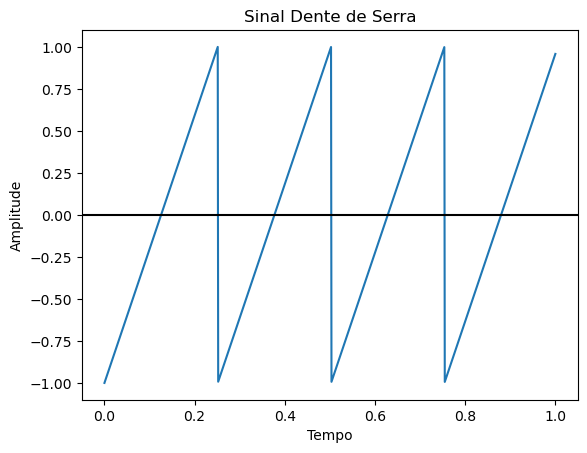

In [169]:
t = np.linspace(0, 1, 1000, endpoint=True) 
plt.plot(t, signal.sawtooth(25 * t)) # a = 25
plt.xlabel('Tempo') 
plt.ylabel('Amplitude') 
plt.title('Sinal Dente de Serra') 
  
plt.axhline(y=0, color='k') 
plt.show() 

Um aspecto interessante do cálculo de norma ocorre quando um sinal é obtido como resultado da combinação linear de $m$ sinais elementares $f_1(t), \cdots, f_m(t)$, ou seja,
$$
g(t)=\sum_{i=1}^m c_i f_i(t)
$$
em que $c_i \in \mathbb{C}$ para todo $i=1, \cdots, m$ são escalares conhecidos. Os sinais elementares funcionam como se constituíssem uma base no espaço dos sinais, a partir da qual outros sinais mais complexos são construídos através de combinações lineares adequadas. Aplicando a definição de norma e fazendo uso da sua distributividade, obtemos
$$
\|g\|^2=\sum_{i=1}^m \sum_{n=1}^m c_i c_j^*\left\langle f_i, f_n\right\rangle
$$
o que coloca em evidência que a igualdade
$$
\|g\|^2=\sum_{i=1}^m\left|c_i\right|^2\left\|f_i\right\|^2
$$

se verifica para sinais elementares que satisfaçam as relações
$$
\left\langle f_i, f_n\right\rangle=\int_{-\infty}^{\infty} f_i(t) f_n(t)^* d t=0
$$
para todo $i \neq n=1, \cdots, m$. Estes sinais são ditos ``ortogonais e se, além disso, forem normalizados`` $\left\|f_i\right\|=1$ para todo $i=1, \cdots, m$ então ``tornam-se ortonormais``. 

Neste caso, a igualdade (2.8) se reduz a $\|g\|^2=\left|c_1\right|^2+\cdots+\left|c_m\right|^2$. É claro que o ponto central deste desenvolvimento situa-se no conhecimento ou na determinação de um conjunto de sinais ortonormais, sobretudo quando o número de sinais elementares for arbitrariamente grande. Este aspecto, por sua importância específica, será objeto de análise detalhada a ser feita mais adiante.

**Definição** (Sinal par e sinal ímpar) Um sinal $f(t)$ com domínio $\mathbb{R}$ é denominado par se $f(t)=f(-t)$ para todo $t \in \mathbb{R} e$ é denominado ímpar se $f(t)=-f(-t)$ para todo $t \in \mathbb{R}$.

Nota-se que, em ambos os casos, os valores de $f(t)$ em cada ponto simétrico do seu domínio $t>0$ e $t<0$ guardam alguma simetria entre si. É claro que um sinal qualquer pode não ser par nem ímpar, mas qualquer sinal pode ser decomposto na forma $f(t)=f_p(t)+f_i(t)$, em que $f_p(t)$ é a sua componente par e $f_i(t)$ é a sua componente ímpar. 

De fato, as componentes par e ímpar de um sinal qualquer $f(t)$ são dadas por

$$
\begin{aligned}
f_p(t) & =\frac{1}{2}(f(t)+f(-t)) \\
f_i(t) & =\frac{1}{2}(f(t)-f(-t))
\end{aligned}
$$
pois, a partir da simples aplicação da definição, conclui-se que o sinal $f_p(t)$ é par e que o sinal $f_i(t)$ é ímpar. ``É também possível verificar com algum esforço que, para qualquer sinal, as suas componentes par e ímpar são ortogonais``. Esta importante propriedade decorre do cálculo do produto escalar 
$$
\begin{aligned}
\left\langle f_p, f_i\right\rangle= & \int_{-\infty}^{\infty} f_p(t) f_i(t)^* d t \\
= & \frac{1}{4} \int_{-\infty}^{\infty}\left(|f(t)|^2+f(-t) f(t)^*\right) d t- \\
& -\frac{1}{4} \int_{-\infty}^{\infty}\left(|f(-t)|^2+f(t) f(-t)^*\right) d t \\
= & \frac{1}{4} \int_{-\infty}^{\infty} h(t) d t-\frac{1}{4} \int_{-\infty}^{\infty} h(-t) d t
\end{aligned}
$$
em que $h(t)=|f(t)|^2+f(-t) f(t)^*$. Como pode ser verificado pela simples mudança de variável $\tau=-t$, as duas integrais são iguais e assim temos $\left\langle f_p, f_i\right\rangle=0$. Em muitas situações é útil lembrar que, para qualquer sinal $f(t)$, o sinal produto a ele associado $s(t)=f(t) f(-t)$ é sempre um sinal par. Observe que o mesmo não ocorre com o sinal resultante da divisão $s(t)=f(t) / f(-t)$, ainda que esta operação possa ser realizada para todo $t \in \mathbb{R}$.

**Exemplo** Considere o sinal $f(t)=e^{\alpha t}$ com domínio $\mathbb{R}$ e imagem $\mathbb{R}_{+}$. Este sinal real não é par e também não é ímpar, mas as suas componentes são imediatamente calculadas como sendo $f_p(t)=\cosh (\alpha t)$ e $f_i(t)=\operatorname{senh}(\alpha t)$. 

O sinal $g(t)=e^{(\alpha+j \beta) t}$ com domínio $\mathbb{R}$ e imagem $\mathbb{C}$ tem a componente par $g_p(t)=\cosh (\alpha t) \cos (\beta t)+j \operatorname{senh}(\alpha t) \operatorname{sen}(\beta t)$ e ímpar $g_i(t)=\operatorname{senh}(\alpha t) \cos (\beta t)+j \cosh (\alpha t) \operatorname{sen}(\beta t)$. É interessante notar que para $\alpha=$ 0 obtém-se $g_p(t)=\cos (\beta t)$ e $g_i(t)=j \operatorname{sen}(\beta t)$, de tal forma que a soma destas duas componentes reproduz o sinal original, como era de se esperar.

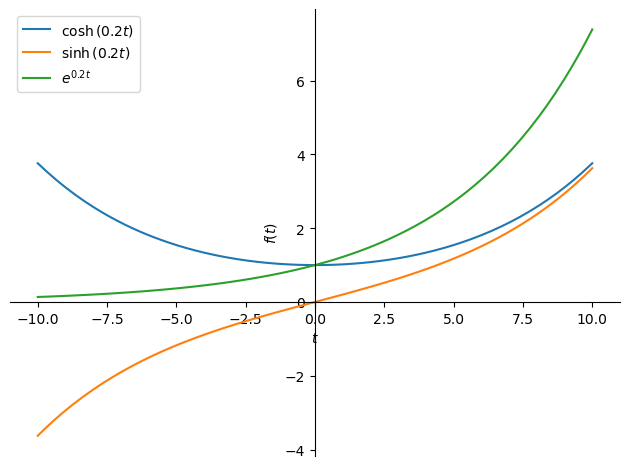

In [140]:
t = sym.Symbol('t')
sym.plot(cosh(.2*t),sinh(.2*t),exp(.2*t), legend = 'True')

**Exemplo** (Energia e Potência) Um resistor com resistência unitária de $R=$ $1[\Omega]$, ao ser submetido a uma tensão $f(t)[\mathrm{V}]$, dissipa a potência instantânea $P(t)=$ $f(t)^2[\mathbf{W}]$ e a energia
$$
E=\int_{-\infty}^{\infty} P(t) d t \text { [Joules] }
$$

Neste caso, sendo $f(t)$ um sinal com imagem em $\mathbb{R}$, verifica-se que $E=\|f\|^2$, ou seja, a norma ao quadrado do sinal de tensão é igual ao valor total da energia dissipada no resistor. Por outro lado, se calcularmos a potência média dissipada em todo o intervalo de tempo $(-\infty, \infty)$ como sendo
$$
P=\lim _{\Delta t \rightarrow \infty} \frac{1}{2 \Delta t} \int_{-\Delta t}^{\Delta t} P(t) d t[\text { Watts] }
$$
então verifica-se imediatamente que $P=\|f\|_{e f}^2$. Ou seja, o valor eficaz ao quadrado do sinal de tensão é igual à potência média dissipada no resistor padrão. Estas duas interpretaçōes físicas ajudam a entender a natureza dos sinais segundo os valores (finitos ou não) da sua norma e do seu valor eficaz.